<a href="https://colab.research.google.com/github/adityakumar529/Projects/blob/main/Crack_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
pip install opencv-python

In [3]:
pip install matplotlib

Tenserflow librar will be used in Deep learning pipeline. OpenCV will be used to clean the images and matplotlib will  be used to visualize the images


In [4]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.1
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.1.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.11.2
bidict                           0.22.1
b

pip list will tell us if all the ibrary that we installed are available or not.So we can see tenserflow,OpenCV and matplotlib all three library are available in the list.

In [5]:
import tensorflow as ts
import os

In [6]:
gpus= ts.config.experimental.list_physical_devices('GPU')
for cpu in gpus:
  ts.config.experimental.set_memory_growth(gpu,True)


the above line of code is to limit the usage of GPU.

In [7]:
import cv2
import imghdr

In [8]:
data_dir = '/content/sample_data/Data'

Providing variable to the path of data folder.

In [9]:
image_exts =  ['png','jpeg','jpg','bmp']

While working with the images we will work with images with the extension of png,jpeg,jpg,bmp. Apart from these if there is any other format then we wont consider that.

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/sample_data/Data/Crack/vector5.svg
Image not in ext list /content/sample_data/Data/Crack/white-powder-surface-cracks-round-260nw-2153827713.jpg
Image not in ext list /content/sample_data/Data/Crack/vector10.svg
Image not in ext list /content/sample_data/Data/Crack/vector14.svg
Image not in ext list /content/sample_data/Data/Crack/vector13.svg
Image not in ext list /content/sample_data/Data/Crack/vector12.svg
Image not in ext list /content/sample_data/Data/Crack/white-powder-surface-cracks-round-600nw-2153827713.jpg
Image not in ext list /content/sample_data/Data/Crack/vector15.svg
Image not in ext list /content/sample_data/Data/Crack/vector18.svg
Image not in ext list /content/sample_data/Data/Crack/surface-cracks-fissures-ground-concrete-600nw-2167683007.jpg
Image not in ext list /content/sample_data/Data/Crack/vector17.svg
Image not in ext list /content/sample_data/Data/Crack/surface-cracks-fissures-ground-concrete-600nw-2262451525.jpg
Image not in ext 

The above line of code wil remove any file that does not image in the format of png,jpg,bmp,jpeg


In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = ts.keras.utils.image_dataset_from_directory(data_dir)

Found 352 files belonging to 2 classes.


**image_dataset_from_directory**: This function is part of the TensorFlow library and is used for creating a tf.data.Dataset from image files in a directory. It automatically labels the data based on subdirectory names.

The resulting data object is likely a tf.data.Dataset object, which is a powerful tool for efficiently loading and preprocessing data for machine learning models.

The above line will build a image dataset from our image.It will take care of the labels/classes.

In [13]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

The **as_numpy_iterator method** is used to convert a tf.data.Dataset into an iterator that yields numpy arrays.A batch of data is created to limit the usage of memory.
The resulting batch variable likely contains a tuple or dictionary with the input data and corresponding labels. The structure would depend on how your dataset was organized and the arguments you passed to image_dataset_from_directory

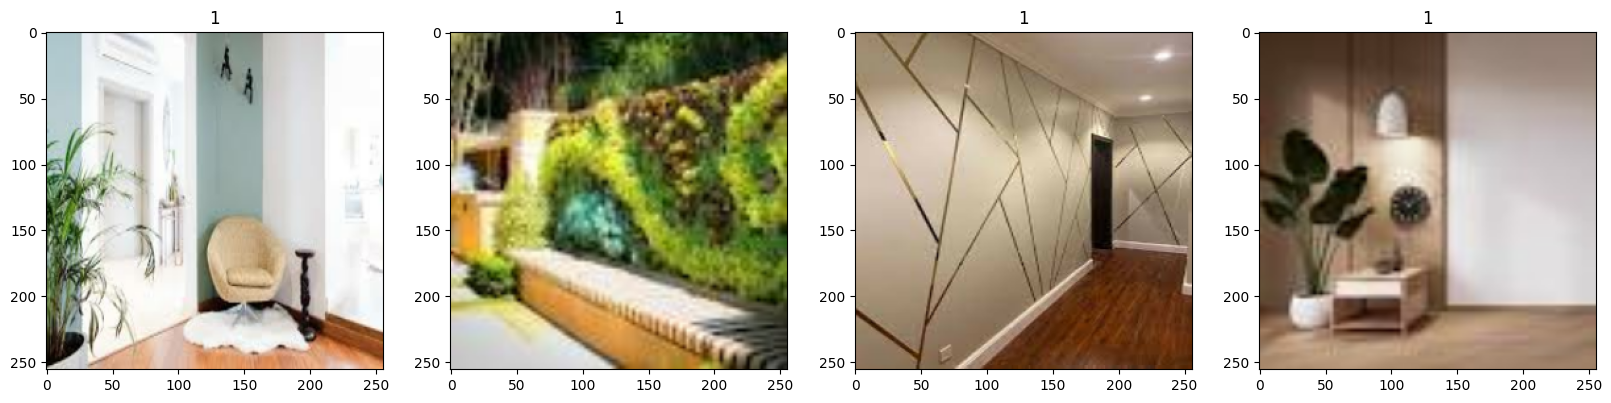

In [14]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

this code creates a visualization of the first four images in the batch along with their labels, displaying them in a grid of subplots. The specific appearance of the images and labels will depend on the data in the batch and the format of the labels.A subplot of 4 images are created with size of 20,20.fig is entire figure and ax is the array of images.A loop of 4 images are created.Every time this code is run a new fig with 4 images will be generated.

In [15]:
data = data.map(lambda x,y: (x/255, y))
data.as_numpy_iterator().next()

(array([[[[0.6418275 , 0.5673177 , 0.44967064],
          [0.59867495, 0.52416515, 0.40651807],
          [0.5247626 , 0.45025277, 0.3326057 ],
          ...,
          [0.1784084 , 0.14238665, 0.08574602],
          [0.22612593, 0.19780178, 0.12852329],
          [0.3334712 , 0.30602023, 0.23543198]],
 
         [[0.6486389 , 0.5741291 , 0.45648208],
          [0.5595464 , 0.48503664, 0.36738956],
          [0.5603231 , 0.48581335, 0.36816627],
          ...,
          [0.18849844, 0.15164389, 0.0913477 ],
          [0.22414035, 0.1958162 , 0.1240437 ],
          [0.27919888, 0.2517479 , 0.1789155 ]],
 
         [[0.6444764 , 0.5699666 , 0.45006773],
          [0.57020223, 0.4956924 , 0.37579352],
          [0.60107553, 0.52656573, 0.40666685],
          ...,
          [0.2675536 , 0.23099358, 0.16387923],
          [0.2708267 , 0.24262787, 0.16148585],
          [0.24789383, 0.22044285, 0.1380516 ]],
 
         ...,
 
         [[0.26534507, 0.20652156, 0.11632548],
          [0.35264

this code snippet normalizes the pixel values of the images by dividing them by 255, a common preprocessing step for image data. The resulting dataset is then converted to a numpy iterator, and the first batch of the modified data is fetched for further processing or visualization.The choice to divide pixel values by 255 is related to the typical range of pixel values in digital images. In standard 8-bit grayscale and RGB images, pixel values range from 0 to 255.

In [16]:
len(data)

11

In [17]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [18]:
train_size


7

We are dividing the total size into train validation and test.These calculations follow a common split convention in machine learning where the dataset is divided into training, validation, and test sets. The specific percentages (70%, 20%, 10%) may vary based on the problem and the available data, and these values are often adjusted based on the specific requirements of the task at hand.

In [19]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Build the deep learning model.The take method is used to select a specified number of elements from the beginning of the dataset.The skip(train_size) method skips the first train_size samples, and then take(val_size) is used to take the next val_size samples. This effectively selects samples from the dataset after the training set.

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [21]:
model = Sequential()

The Sequential model is a linear stack of layers, and you can add layers to it in a sequential manner.

In [22]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

Here we have 2 layer. One convolution and one max pooling layer. The convolution layer has 16 filter of size (3,3)and stride of 1.With activation function as Relu applied on image with size (256,256) of 3 bands.  The second layer is maxpooling layer.It reduces the spatial dimension of the output. Stride of 1 means at a time onlyone pixel will be moved. Max pooling is a downsampling operation that reduces the spatial dimensions of the representation and retains the most important information. By default, it uses a pool size of (2, 2).

In [23]:
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

Another convulation layer with 32 filter and 1 stride with size of (3,3). Another maxpooling layer to reduce spatial dimensions.

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

Another convulation layer with 16 filter and 1 stride with image size of (3,3). One more maxpooling layer to reduce spatial dimention of convolution layer.

In [25]:
model.add(Flatten())

This layer is used to flatten the output from the previous layer into a one-dimensional array. It prepares the data for the fully connected layers.

In [26]:
model.add(Dense(256, activation='relu'))

A fully connected layer with 256 units and ReLU activation is added.

In [27]:
model.add(Dense(1, activation='sigmoid'))

Final layer with fully connected layer with sigmoid activation function.Sigmoid activation is commonly used for binary classification problems, where the output is interpreted as a probability.

In [28]:
model.compile('adam', loss=ts.losses.BinaryCrossentropy(), metrics=['accuracy'])

ts.losses.BinaryCrossentropy(): This sets the loss function to binary crossentropy. Binary crossentropy is commonly used for binary classification problems, where the task is to predict between two classes.Adam is a popular optimization algorithm that adapts the learning rate during training.Model is configured for binary classification, using the Adam optimizer, binary crossentropy loss, and accuracy as the evaluation metric during training. This configuration is suitable for binary classification tasks where you are predicting between two classes.

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

model.compile is used to configure the model  for training.Adam is a popular optimizer used in gradiant based optimization.The optimizer in the context of model training is a crucial component responsible for adjusting the parameters (weights and biases) of a neural network during the training process. Its primary function is to minimize the value of the loss function by iteratively updating the model's parameters based on the gradients of the loss with respect to those parameters.
loss=ts.losses.BinaryCrossentropy(): This sets the loss function to binary crossentropy. Binary crossentropy is commonly used for binary classification problems, where the model is trained to predict probabilities for two classes.

The model.summary() function in Keras is used to display a concise summary of the neural network model, providing information about the architecture, layer types, output shapes, and the number of parameters

In [30]:
logdir='/content/sample_data/logs'


In [31]:
tensorboard_callback = ts.keras.callbacks.TensorBoard(log_dir=logdir)

This line creates an instance of the TensorBoard callback, and tensorboard_callback is a variable that holds this instance.
TensorBoard is useful for visualizing various aspects of the model training process, including metrics, loss curves, and histograms of weights.

In [32]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 27s 2s/step - loss: 1.1387 - accuracy: 0.4955 - val_loss: 0.6672 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 19s 2s/step - loss: 0.6855 - accuracy: 0.5536 - val_loss: 0.6762 - val_accuracy: 0.5000
Epoch 3/20
7/7 [==============================] - 25s 3s/step - loss: 0.6566 - accuracy: 0.5536 - val_loss: 0.6264 - val_accuracy: 0.6719
Epoch 4/20
7/7 [==============================] - 20s 2s/step - loss: 0.6193 - accuracy: 0.6339 - val_loss: 0.5699 - val_accuracy: 0.7344
Epoch 5/20
7/7 [==============================] - 19s 2s/step - loss: 0.5800 - accuracy: 0.6518 - val_loss: 0.6849 - val_accuracy: 0.5156
Epoch 6/20
7/7 [==============================] - 20s 2s/step - loss: 0.6082 - accuracy: 0.6473 - val_loss: 0.5847 - val_accuracy: 0.6875
Epoch 7/20
7/7 [==============================] - 20s 2s/step - loss: 0.5759 - accuracy: 0.6875 - val_loss: 0.5254 - val_accuracy: 0.7969
Epoch 8/20
7/7 [==================

This line of code is using the fit method to train the neural network model on the training data **(train)** for 20 epochs, validating on the validation data **(val)**, and using the TensorBoard callback for logging.

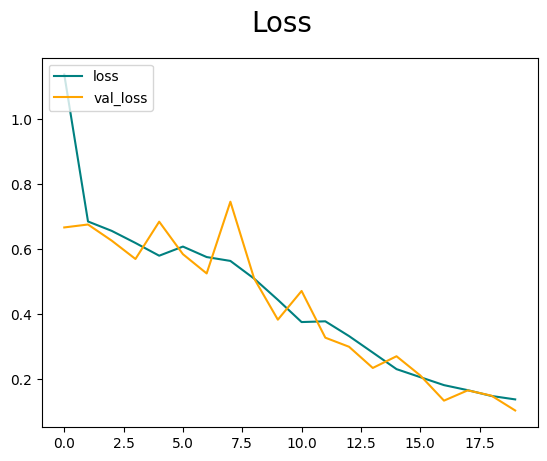

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Plot provides a visual representation of how the training and validation loss change over the epochs. The x-axis typically represents the number of epochs, and the y-axis represents the loss values. The training loss curve shows how well the model is fitting the training data, while the validation loss curve gives insights into how well the model generalizes to unseen data.

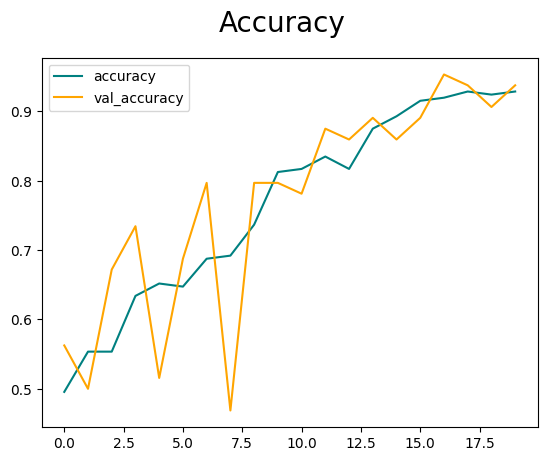

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
pre = Precision()
re = Recall()
acc = BinaryAccuracy()
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)


1/1 [==============================] - 1s 547ms/step


This code is evaluating precision, recall, and binary accuracy metrics on a test set using the trained model.

In [36]:
print(f'precison is {pre.result().numpy()}')
print(f'recall is {re.result().numpy()}')
print(f'accuracy is {acc.result().numpy()}')

precison is 1.0
recall is 0.9473684430122375
accuracy is 0.96875


We want to check if there is crack in the image or not.For that we will test out modal on one image

In [37]:
import cv2

In [38]:
from tensorflow.image import resize
import matplotlib.pyplot as plt

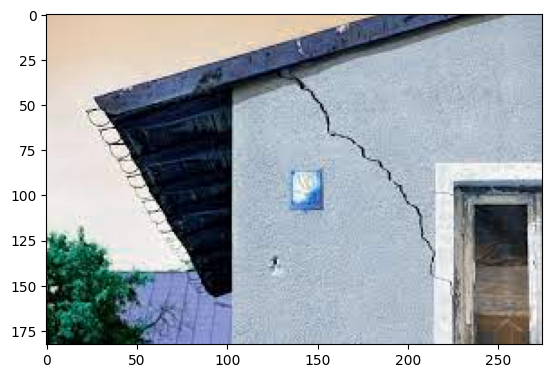

In [39]:
img = cv2.imread('/content/sample_data/crack.jpg')
plt.imshow(img)
plt.show()

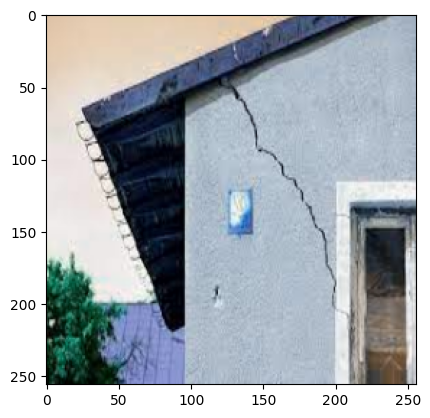

In [40]:
resize = ts.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [41]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 102ms/step


array([[0.14665022]], dtype=float32)

In [42]:
if yhat > 0.5:
    print(f'Predicted class is Crack free')
else:
    print(f'Predicted class is Crack ')

Predicted class is Crack 


In [44]:
from tensorflow.keras.models import load_model
model.save(os.path.join('/content/sample_data/Models','classifier.h5'))
new_model = load_model('/content/sample_data/Models/classifier.h5')
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 107ms/step


array([[0.14665022]], dtype=float32)

The above code is used to save the model.